# package_LAB

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_LAB
from package_LAB import LeadLag_RT, PID_RT, Margin, IMC_Tuning
import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

from importlib import reload
package_LAB = reload(package_LAB)

## LeadLag_RT()

(0.0, 100.0)

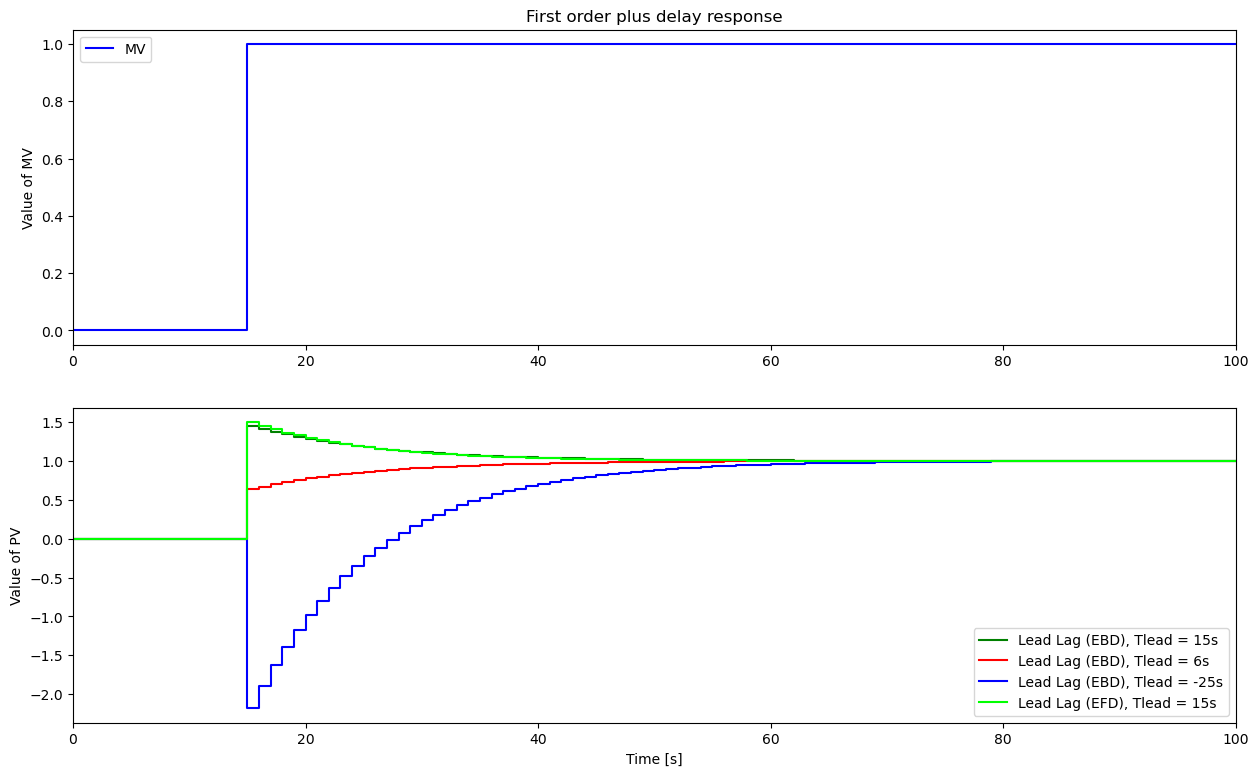

In [16]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 15: 1, TSim: 1}

t = []
MV = []
MVDelay = []
PV_EBD1 = []
PV_EBD2 = []
PV_EBD3 = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead1 = 15
Tlead2 = 6
Tlead3 = -25
Tlag = 10
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    LeadLag_RT(MV,Kp,Tlead1,Tlag,Ts,PV_EBD1)
    LeadLag_RT(MV,Kp,Tlead2,Tlag,Ts,PV_EBD2)
    LeadLag_RT(MV,Kp,Tlead3,Tlag,Ts,PV_EBD3)
    LeadLag_RT(MV,Kp,Tlead1,Tlag,Ts,PV_EFD,0,'EFD')
    #FO_RT(MV,Kp,T,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD1,'g-',label='Lead Lag (EBD), Tlead = 15s',where='post')
plt.step(t,PV_EBD2,'r-',label='Lead Lag (EBD), Tlead = 6s',where='post')
plt.step(t,PV_EBD3,'b-',label='Lead Lag (EBD), Tlead = -25s',where='post')
plt.step(t,PV_EFD,'lime',label='Lead Lag (EFD), Tlead = 15s',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

## PID_RT()

(0.0, 200.0)

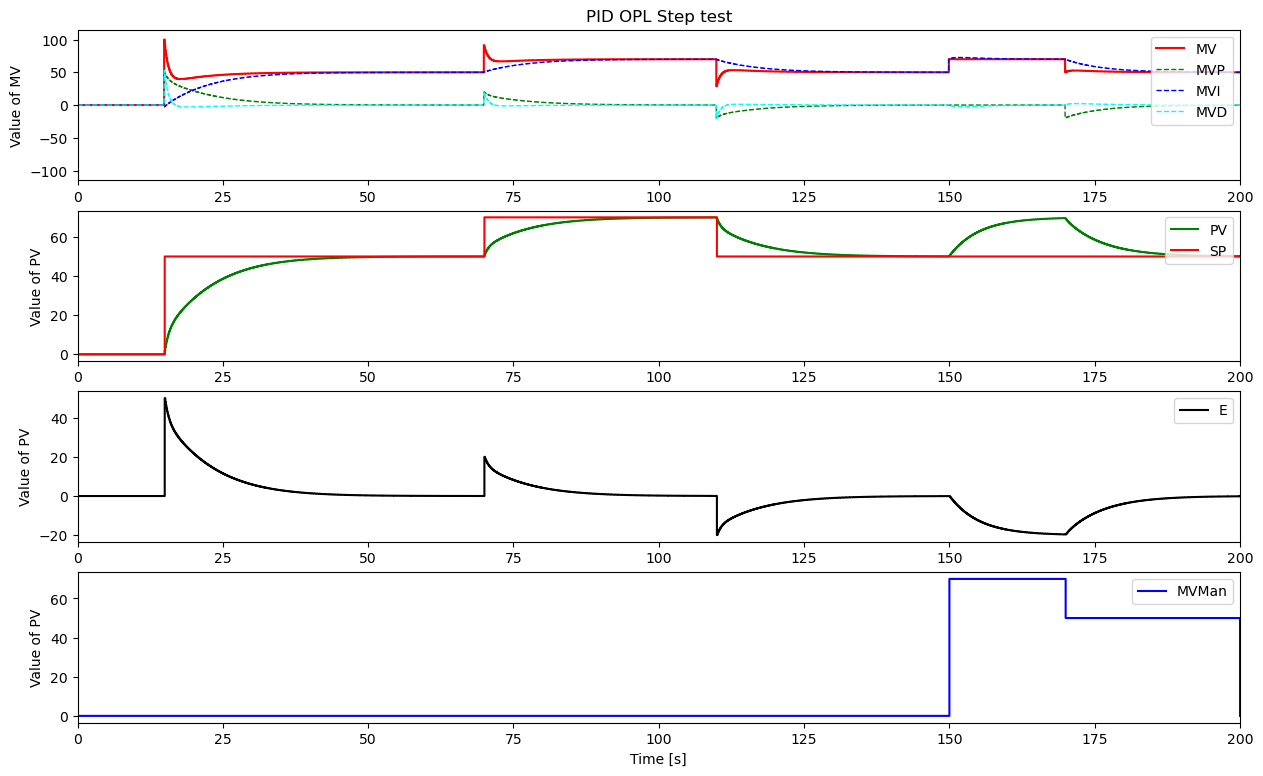

In [17]:
TSim = 200
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 15: 1, TSim: 1}
SPPath = {0:0, 15:50, 70:70, 110:50, TSim:50}
MVManPath = {0:0, 150:70, 170:50, TSim:0}
ManPath = {0:0, 150:1, 170:0, TSim:0}

t = []
MV = [0]
SP = []
PV = []
Man = []
MVMan = []
MVFF = [0]
MVP = []
MVI = []
MVD = []


# Parameters
Kp = 1
KpExp = 0.4971
KdExp = 0.3734
Kc = 1
Td = 1
Ti = 6
alpha = 0.9
theta_pExp = 4.386
MVMin = 0
MVMax = 100
E = []
ManFF=False
PVInit=0
method='EBD-EBD'
TFO = 5



for i in range(0,N):
    t.append(i*Ts)
    #SelectPath_RT(MVPath,t,MV)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(ManPath,t,Man)
    
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF)
    
    FO_RT(MV,Kp,TFO,Ts,PV)
    


plt.figure(figsize = (15,9))

plt.subplot(4,1,1)
plt.step(t,MV,'r-',label='MV',where='pre')
plt.step(t,MVP,'green',label='MVP',where='pre', ls = '--', linewidth = '1' )
plt.step(t,MVI,'blue',label='MVI',where='pre', ls = '--', linewidth = '1')
plt.step(t,MVD,'cyan',label='MVD',where='pre', ls = '--', linewidth = '1')
#plt.plot(MVI, ls = ':')
plt.ylabel('Value of MV')
plt.title('PID OPL Step test')
plt.legend(loc="upper right", bbox_to_anchor=(1,1))
plt.xlim([0, TSim])
plt.ylim([-115,115])

plt.subplot(4,1,2)
plt.step(t,PV,'-g', label='PV',where='post')
plt.step(t,SP,'-r', label='SP',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc="upper right", bbox_to_anchor=(1,1))
plt.xlim([0, TSim])    

plt.subplot(4,1,3)
plt.step(t,E,'black', label='E',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim]) 

plt.subplot(4,1,4)
plt.step(t,MVMan,'-b', label='MVMan',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim]) 

## OPEN_LOOP_TEST : Step, Saturation and Manual Mode Tests

(0.0, 150.0)

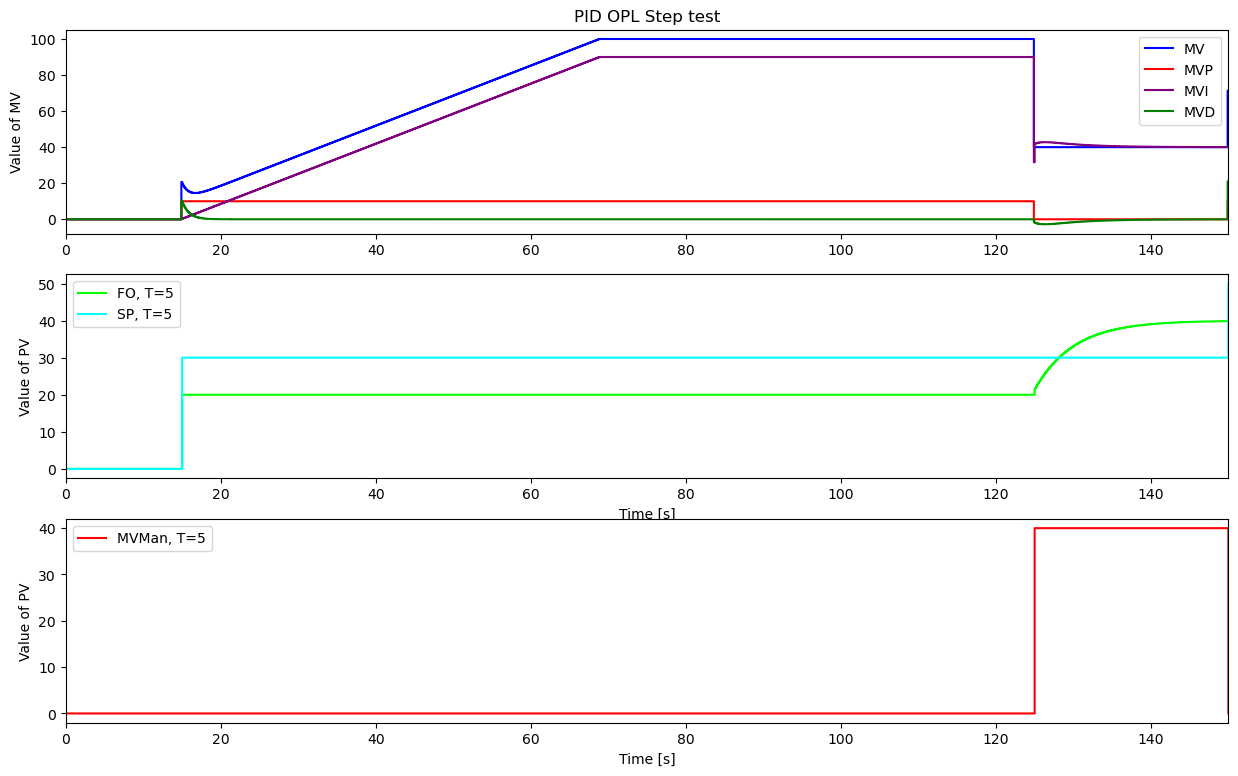

In [18]:
TSim = 150
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 15: 1, TSim: 1}
SPPath = {0:0, 15:30, TSim:50}

MVManPath = {0:0, 125:40, 150:0, TSim:0}
ManPath = {0:False, 125:True, 150:False, TSim:False}

PVPath = {0:0, 15:20, 125:0}

t = []
MV = [0]
SP = []
PV = []
Man = []
MVMan = []
MVFF = []
MVP = []
MVI = []
MVD = []


# Parameters
Kp = 1
KpExp = 0.4971
KdExp = 0.3734
Kc = 1
Td = 1
Ti = 6
alpha = 0.9
theta_pExp = 4.386
MVMin = 0
MVMax = 100
E = []
ManFF=False
PVInit=0
method='EBD-EBD'



for i in range(0,N):
    t.append(i*Ts)
    MVFF.append(0)
    #SelectPath_RT(MVPath,t,MV)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(ManPath,t,Man)
    if(i < 1250):
        SelectPath_RT(PVPath,t,PV)
    if(i >= 1250): 
        FO_RT(MV,Kp,TFO,Ts,PV)
       
    
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF)
   
    
    
plt.figure(figsize = (15,9))

plt.subplot(3,1,1)
plt.step(t,MV,'b-',label='MV',where='pre')
plt.step(t,MVP,'r-',label='MVP',where='pre')
plt.step(t,MVI,'purple',label='MVI',where='pre')
plt.step(t,MVD,'g-',label='MVD',where='pre')
plt.ylabel('Value of MV')
plt.title('PID OPL Step test')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(3,1,2)
plt.step(t,PV,'lime',label='FO, T=5',where='post')
plt.step(t,SP,'cyan',label='SP, T=5',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(3,1,3)
plt.step(t,MVMan,'-r',label='MVMan, T=5',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

## Margin()

(7.632734535422068, 142.2995823325969)


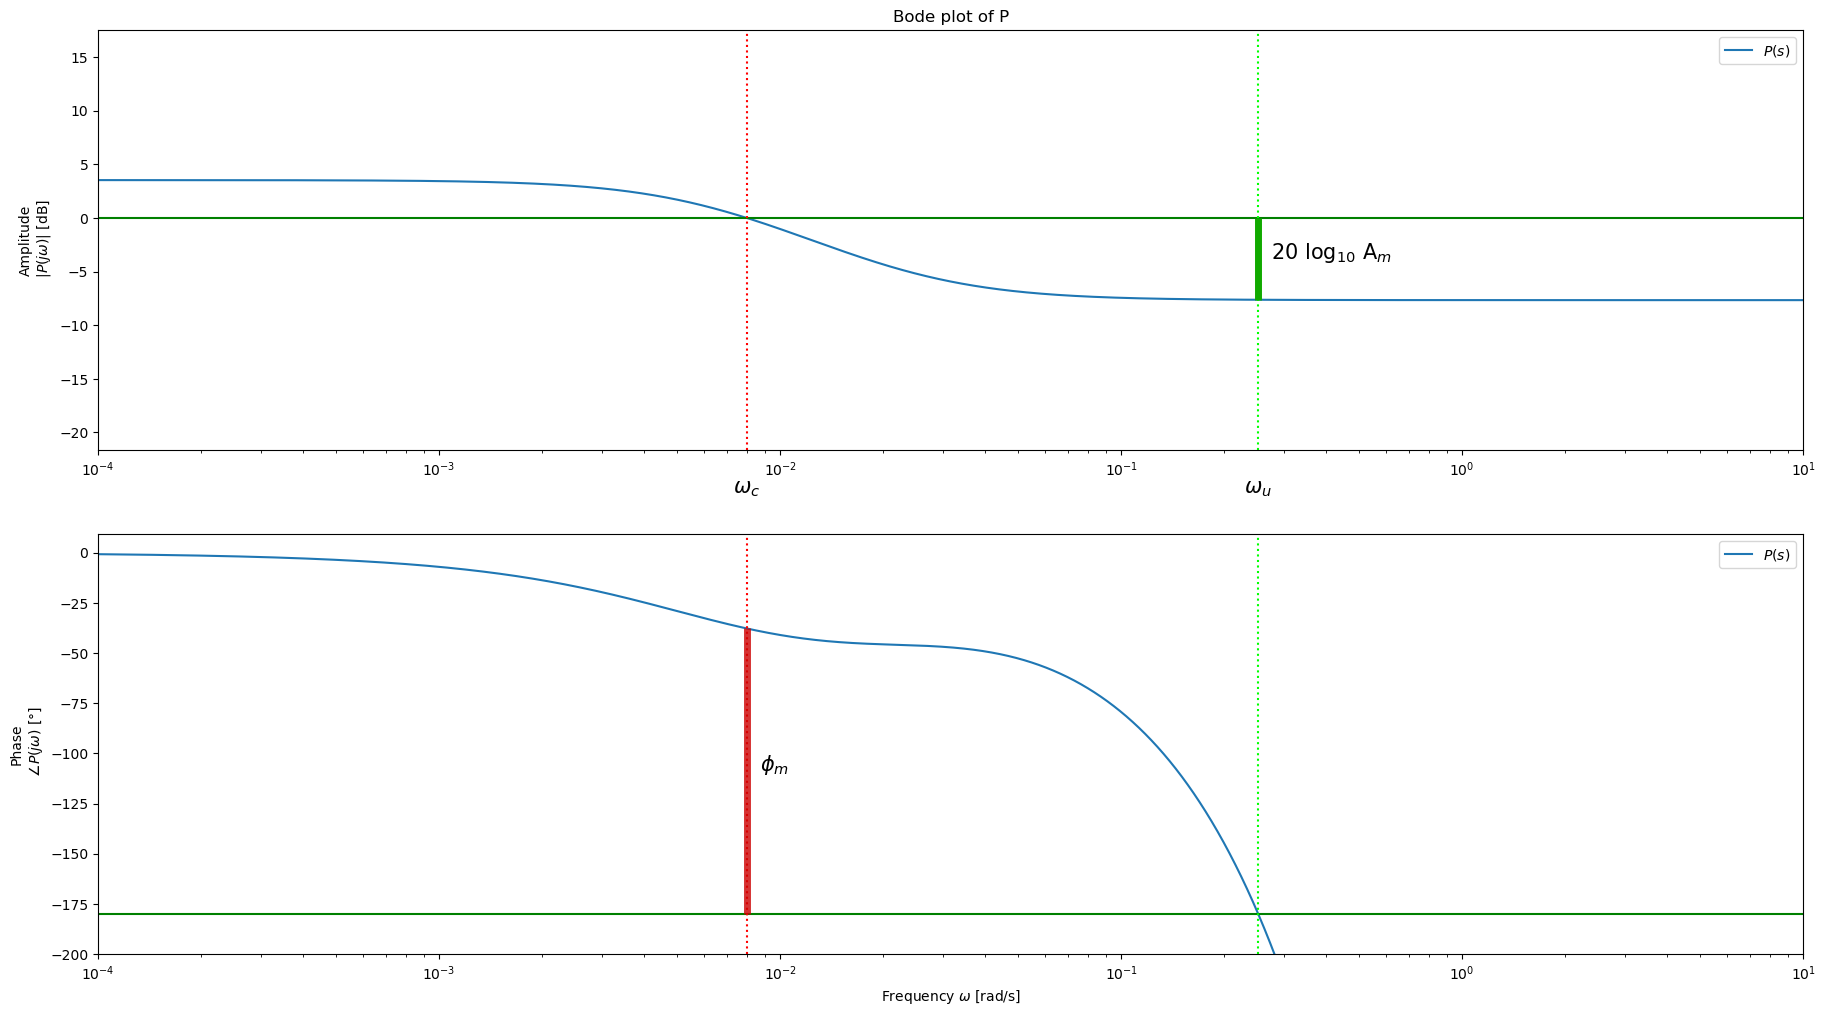

In [19]:
P = Process({}) # Default process = unit gain

#parameters
Kp = 1.5
Tlag1 = 20
Tlag2 = 25
theta = 30

K = 0.37339891844298917
T1 = 153.9968866334296
T2 = 42.466230845265265
theta = 12.180567972996636

Am = None
Phim = None

# Parameters for input-output dynamics P(s)
P.parameters['Kp'] = Kp
P.parameters['Tlag1'] = T1
P.parameters['Tlead1'] = T2
#P.parameters['Tlag2'] = Tlag2
P.parameters['theta'] = theta

omega = np.logspace(-4, 1, 10000)

P1 = Margin(P,omega, Am, Phim,omegaC=0, omegaU=0, Show=True)

print(P1)

## help (IMC_Tuning())

In [20]:
help(IMC_Tuning)

Help on function IMC_Tuning in module package_LAB:

IMC_Tuning(T1, T2, T1p, gamma, Kp)
        IMC_Tuning calculates the parameters for an Internal Model Control (IMC) tuning method.
    
    Parameters:
    - T1: Float, time constant of the process.
    - T2: Float, time delay of the process.
    - T1p: Float, time constant of the filter.
    - gamma: Float, tuning parameter.
    - Kp: Float, process gain.
    
    Returns:
    - List: A list containing the calculated parameters in the following order:
        - Kc: Float, controller gain.
        - Ti: Float, integral time.
        - Td: Float, derivative time.
        - Tclp: Float, closed-loop time constant of the process.
    
    Formula used:
    - Tclp = gamma * T1p
    - Kc = ((T1 + T2) / Tclp) / Kp
    - Ti = T1 + T2
    - Td = (T1 * T2) / (T1 + T2)



## IMC Tuning 

In [21]:
TSim = 300
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for SP & MVMan
SPPath = {0:0, 5:25, 220:15, TSim:15}
MVManPath = {0:0, 100:40, 160:0, TSim:0}
ManPath = {0:False, 100:True, 159:False, TSim:False}

t = []
MV = [0]
SP = []
PV = []
Man = []
MVMan = []
MVFF = [0]
MVP = []
MVI = []
MVD = []


# Parameters
Kp = 1
alpha = 1
theta = 5
MVMin = 0
MVMax = 100
E = []
ManFF=False
PVInit=0
method='EBD-EBD'

T1 = 15
T2 = 10
T1p = 25
gamma = 0.5

[Kc, Ti, Td] = IMC_Tuning(T1, T2, T1p, gamma, Kp)

print(Kc)
print(Ti)
print(Td)



for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(ManPath,t,Man)
    
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF)
    
    FO_RT(MV,Kp,T1p,Ts,PV)
    


plt.figure(figsize = (15,9))

plt.subplot(3,1,1)
plt.step(t,MV,'r-',label='MV',where='pre')
plt.step(t,MVP,'green',label='MVP',where='pre', ls = '--', linewidth = '1' )
plt.step(t,MVI,'blue',label='MVI',where='pre', ls = '--', linewidth = '1')
plt.step(t,MVD,'cyan',label='MVD',where='pre', ls = '--', linewidth = '1')
#plt.plot(MVI, ls = ':')
plt.ylabel('Value of MV')
plt.title('PID OPL Step test')
plt.legend(loc="upper right", bbox_to_anchor=(1,1))
plt.xlim([0, TSim])
plt.ylim([-115,115])

plt.subplot(3,1,2)
plt.step(t,PV,'-g', label='PV',where='post')
plt.step(t,SP,'-r', label='SP',where='post')
plt.step(t,E,'black', label='E',where='post', linewidth = 0.8)
plt.axhline(y=0, color='black',linestyle='--', linewidth = 0.5)
plt.ylabel('Value of PV')
plt.legend(loc="upper right", bbox_to_anchor=(1,1))
plt.xlim([0, TSim]) 

plt.subplot(3,1,3)
plt.step(t,MVMan,'-b', label='MVMan',where='post')
plt.ylabel('Value of MVMan')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim]) 

2.0
25
20.0


NameError: name 'Tclp' is not defined